## To Analyse the hot words for Sansa Win the Throne, we will begin to use NLP to model the words we have, hopefully from the data analysis we will find the business marketing direction

In [1]:
import pandas as pd
import numpy as np
import requests, json, time, datetime
import praw
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction import text 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')

In [3]:
df['target'] = df['subreddit'].map({'BranWinsTheThrone': 0, 'SansaWinsTheThrone': 1}) 
df

,Unnamed: 0,title,body,subreddit,comments,alltext,target
0,0,The results of the Throne Pool,When the process of putting together this Thro...,BranWinsTheThrone,Shout out to the OGs who were here before the ...,The results of the Throne PoolWhen the process...,0
1,1,You should receive your r/branwinsthethrone ba...,void,BranWinsTheThrone,"If you selected ""Team Nobody"" in the Throne Po...",You should receive your r/branwinsthethrone ba...,0
2,2,Bran’s plan,void,BranWinsTheThrone,He look high afHe look high afJon *wanted* to ...,Bran’s planvoidHe look high afHe look high afJ...,0
3,3,The 3 iRaven,void,BranWinsTheThrone,"I think $5,000 is reasonable.I think $5,000 is...","The 3 iRavenvoidI think $5,000 is reasonable.I...",0
4,4,Bran=Communism,void,BranWinsTheThrone,"I mean, the connection is so obvious they made...","Bran=CommunismvoidI mean, the connection is so...",0
...,...,...,...,...,...,...,...
1723,1723,😤,void,SansaWinsTheThrone,No it won’tNo it won’tOH SHIT.OH SHIT.,😤voidNo it won’tNo it won’tOH SHIT.OH SHIT.,1
1724,1724,Great analysis of Cersei and Daenerys and why ...,[https://www.youtube.com/watch?v=m1O8U8VEMoY]...,SansaWinsTheThrone,Ugh! HBO had it taken down for copyright viola...,Great analysis of Cersei and Daenerys and why ...,1
1725,1725,She doesn't need to but if she WANTS.. Who do ...,void,SansaWinsTheThrone,MARGERY TYRELLMARGERY TYRELLPodrick. Sexual pr...,She doesn't need to but if she WANTS.. Who do ...,1
1726,1726,Dany Fans be like,void,SansaWinsTheThrone,The constant complaints that Dany’s heel turn ...,Dany Fans be likevoidThe constant complaints t...,1


In [4]:
df.shape

(1728, 7)

## First of all we need to check if data is balanced

In [5]:
df['target'].value_counts(normalize=True)

1    0.567708
0    0.432292
Name: target, dtype: float64

## Sneakpeek of Data: Whose fan talks more? (more royal)

In [6]:
df['alltext_word_count'] = df['alltext'].apply(lambda x: len(x.split()))

In [7]:
df['alltext_char_count'] = df['alltext'].apply(len)

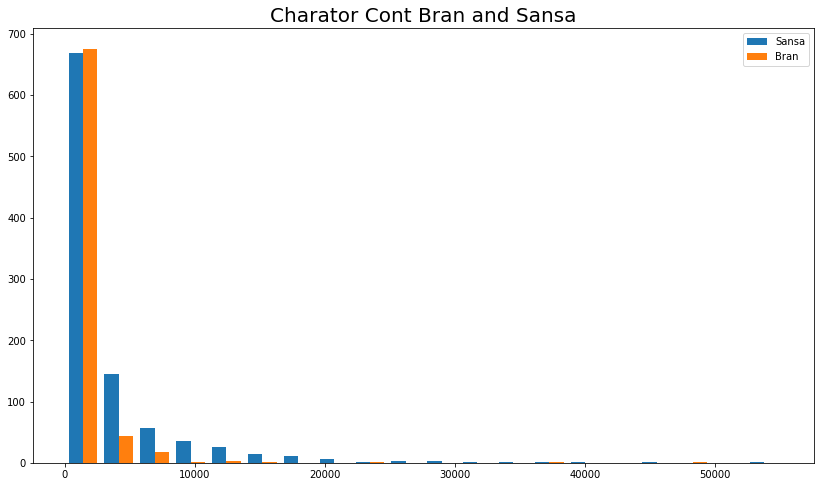

In [8]:
sansa_mask = (df['target'] == 1)
plt.figure(figsize=(14, 8))
plt.hist(
    [df[sansa_mask]['alltext_char_count'], df[~sansa_mask]['alltext_char_count']],
    bins = 20
        )

plt.legend(['Sansa', 'Bran'])
plt.title('Charator Cont Bran and Sansa',size = 20);

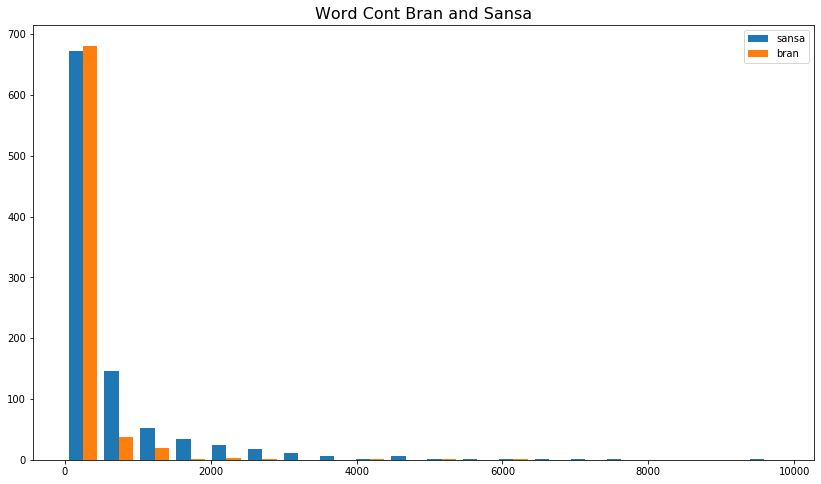

In [9]:
plt.figure(figsize=(14, 8))
plt.hist(
     [df[sansa_mask]['alltext_word_count'], df[~sansa_mask]['alltext_word_count']],
     bins=20
 )
plt.legend(['sansa', 'bran'])
plt.title('Word Cont Bran and Sansa',size = 16);

### Seems Bran's fan talks short, Sansa's fan loves paragraphs.

## let's turn the model in, first, we use countvectorizer to make the words a dataframe

In [10]:
cvec = CountVectorizer(stop_words='english', max_df=.95, min_df=3)

In [11]:
term_matrix = cvec.fit_transform(df['alltext'])

In [12]:
# This is the number of unique words, exluding the limitations we initially put in
cvec.get_feature_names()

['00',
 '000',
 '01',
 '05',
 '07',
 '10',
 '100',
 '1000',
 '10000',
 '101',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '180',
 '1815b71a2e633176b1c509f3a186605b',
 '19',
 '1st',
 '20',
 '2011',
 '2018',
 '2019',
 '20s',
 '21',
 '23',
 '24',
 '25',
 '2nd',
 '30',
 '300',
 '30k',
 '31',
 '33',
 '3er',
 '3i',
 '3rd',
 '3the',
 '40',
 '48',
 '4d',
 '50',
 '500',
 '57',
 '60',
 '63',
 '67',
 '6xrrvh',
 '70',
 '75',
 '77',
 '7k',
 '80',
 '8000',
 '804',
 '83',
 '87',
 '90',
 '95',
 '97',
 '99',
 '_nomnomzombies',
 'abandon',
 'abandoned',
 'abandoning',
 'abilities',
 'ability',
 'able',
 'abrupt',
 'absolute',
 'absolutely',
 'absorbed',
 'abuse',
 'abused',
 'abuser',
 'abusers',
 'abusing',
 'abusive',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidentally',
 'accomplish',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accountable',
 'accounts',
 'accurate',
 'acc

In [13]:
term_df = pd.DataFrame(term_matrix.toarray(), columns=cvec.get_feature_names())

term_df.head()

,00,000,01,05,07,10,100,1000,10000,101,...,youth,youtu,youtube,yt,yup,zero,zig,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
term_df.shape

(1728, 6172)

In [13]:
#term_df['Target']   #to check if 'target' is in the frame, it should come out as error

## When we make the target column regarding the words, we needs to make sure 'target' is not one of the words. Based on the checking, it is one of the words, so I used 'Target' with capitalized T to put it in.

In [14]:
term_df['Target'] = df['target']
term_df.head()

,00,000,01,05,07,10,100,1000,10000,101,...,youtu,youtube,yt,yup,zero,zig,zombie,zombies,zone,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
freq_dict = {word: term_df[word].sum() for word in cvec.get_feature_names()}


In [16]:
freq_df = pd.DataFrame(freq_dict, index=['counts'])
freq_df = freq_df.T

In [17]:
freq_df.sort_values(by='counts', ascending=False).head(20)

,counts
sansa,7889
bran,5982
like,3432
just,3250
queen,3065
jon,2868
dany,2686
people,2652
north,2629
think,2263


In [18]:
top_20_words = list(freq_df.sort_values(by='counts', ascending=False).head(20).index)
# Append 'target' to the list
top_20_words.append('Target')
top_20_words

['sansa',
 'bran',
 'like',
 'just',
 'queen',
 'jon',
 'dany',
 'people',
 'north',
 'think',
 'love',
 'throne',
 'don',
 'did',
 'king',
 'got',
 'character',
 'really',
 'season',
 'arya',
 'Target']

Text(0.5, 1, 'Sansa Hot Word Draft')

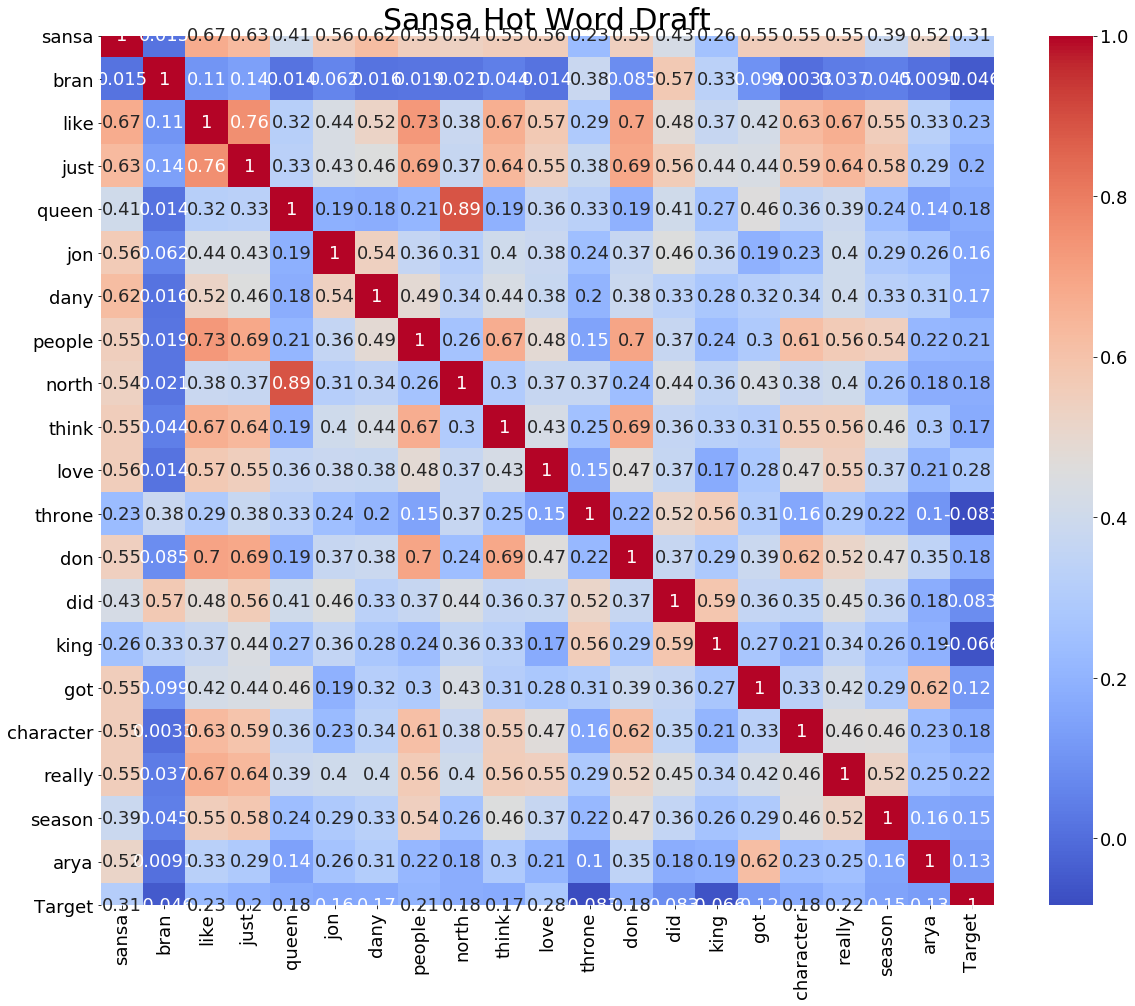

In [123]:
corr = term_df[top_20_words].corr()
plt.figure(figsize=(20,16))
plt.rc('font', size=18)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Sansa Hot Word Draft',size = 30)

## This heatmap cannot clealy tell there is any top word related to target(If the user support the queen, but it shows there are words related that we should look at phrases with more than one word.)

In [20]:
term_df['Target'].value_counts(normalize = True)

1    0.567708
0    0.432292
Name: Target, dtype: float64

In [21]:
term_df.corr()[['Target']].sort_values('Target').head(15)

,Target
raven,-0.184791
eyed,-0.179020
wheelchair,-0.149393
voidvoid,-0.112831
wheels,-0.097290
leaked,-0.096061
nobodywinsthethrone,-0.090962
greenseers,-0.089882
brans,-0.088702
vegas,-0.088505


## Based on word count, what are the words appears most often regarding Bran?

In [22]:
# most important to class 0 (not sansa)
term_df.groupby('Target').mean().T.sort_values(0, ascending=False).head(10)

Target,0,1
bran,7.041499,0.735984
throne,1.487282,0.855250
king,1.262383,0.827727
just,0.925033,2.608563
like,0.803213,2.886850
did,0.680054,1.307849
think,0.659973,1.804281
won,0.555556,0.431193
iron,0.540830,0.350663
win,0.534137,0.341488


## Same count, what are the words appears most often regarding Sansa?

In [23]:
# most important to class 1 (sansa)
term_df.groupby('Target').mean().T.sort_values(1, ascending=False).head(10)

Target,0,1
sansa,0.282463,7.826707
queen,0.116466,3.035678
like,0.803213,2.886850
just,0.925033,2.608563
jon,0.453815,2.577982
dany,0.227577,2.564730
north,0.174029,2.547401
people,0.368139,2.423038
love,0.178046,1.873598
think,0.659973,1.804281


### Let's model them

In [24]:
X=df['alltext']
y=df['target']

In [25]:
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify = y,random_state = 42, test_size = 0.4)

 ## Base line

In [26]:
y_train.value_counts(normalize=True)

1    0.567568
0    0.432432
Name: target, dtype: float64

### This is a simple prediction of the model, that 56.8% of the user support Sansa. We will use classification model to predict each one of them.

## Basic CountVecorizer and Logistic Regression

In [27]:
cv = CountVectorizer()
cv.fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [28]:
lr = LogisticRegressionCV()

lr.fit(X_train_cv, y_train)
lr.score(X_train_cv, y_train), lr.score(X_test_cv, y_test)

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.9478764478764479, 0.8829479768786127)

In [29]:
## CV+Multinomial

In [30]:
mnb = MultinomialNB()

mnb.fit(X_train_cv, y_train)
mnb.score(X_train_cv, y_train), mnb.score(X_test_cv, y_test)

(0.943050193050193, 0.8742774566473989)

## Tifdf with Logistic Regression

In [31]:
tf = TfidfVectorizer()

tf.fit(X_train, y_train)
X_train_tf = tf.transform(X_train).todense()
X_test_tf = tf.transform(X_test).todense()


In [32]:
lr_tf = LogisticRegressionCV()

lr_tf.fit(X_train_tf, y_train)
lr_tf.score(X_train_tf, y_train), lr.score(X_test_tf, y_test)

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(1.0, 0.4320809248554913)

## Tifdf with Gaussian

In [33]:
tf = TfidfVectorizer()

tf.fit(X_train, y_train)
X_train_gnb = tf.transform(X_train).todense()
X_test_gnb = tf.transform(X_test).todense()

gnb = GaussianNB()

gnb.fit(X_train_gnb, y_train)
gnb.score(X_train_gnb, y_train), gnb.score(X_test_gnb, y_test)

(0.9816602316602316, 0.7413294797687862)

## CountVectorizer and Logistic Regression pipeline

In [34]:
pipe_cv = Pipeline([
    ('cv', CountVectorizer()),
    ('logreg', LogisticRegressionCV())
])

params_grid = {
    'cv__max_features': [500,1000,2000],
    'cv__stop_words': ['english', None],
    'cv__ngram_range': [(1,1), (1,2)]
}

gs_cv = GridSearchCV(pipe_cv, params_grid)
gs_cv.fit(X_train, y_train)


C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the n

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cv',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [35]:
gs_cv.score(X_train, y_train), gs_cv.score(X_test, y_test)

(0.972007722007722, 0.9002890173410405)

In [36]:
gs_cv.best_estimator_

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=2000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logreg',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn',
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=100, multi_class='warn',
           

## TfidfVectorizer and Logistic Regression pipeline

In [37]:
pipe_tf = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegressionCV())
])

params_grid = {
    'tf__max_features': [500, 1000,2000],
    'tf__stop_words': ['english', None],
    'tf__ngram_range': [(1,1), (1,2)],
    #'lr__penalty': ['l1', 'l2']
}

gs_tf = GridSearchCV(pipe_tf, params_grid)
gs_tf.fit(X_train, y_train)


C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packa

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureW

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [38]:
gs_tf.score(X_train, y_train), gs_tf.score(X_test, y_test)

(0.9420849420849421, 0.9104046242774566)

In [39]:
rf = RandomForestClassifier(n_estimators=100)

In [40]:
pipe_rf = Pipeline([
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

rf_params = {
    'cv__max_features': [500,1000,2000],
    'cv__stop_words': ['english', None],
    'cv__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None]
}

gs_rf = GridSearchCV(pipe_rf, rf_params)
gs_rf.fit(X_train, y_train)


C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cv',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [41]:
gs_rf.score(X_train, y_train), gs_rf.score(X_test, y_test)

(0.9942084942084942, 0.8945086705202312)

In [42]:
pipe_tf_rf = Pipeline([
    ('tf', TfidfVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

tf_rf_params = {
    'tf__max_features': [500,1000,2000],
    'tf__stop_words': ['english', None],
    'tf__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None]
}

gs_tf_rf = GridSearchCV(pipe_tf_rf, tf_rf_params)
gs_tf_rf.fit(X_train, y_train)

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [43]:
gs_tf_rf.score(X_train, y_train), gs_tf_rf.score(X_test, y_test)

(0.9903474903474904, 0.8901734104046243)

In [44]:
gs_tf.best_estimator_

Pipeline(memory=None,
         steps=[('tf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn',
                                      dual=False, fit_intercept=True,
 

In [45]:
preds = gs_tf.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, preds)

In [47]:
cm_df = pd.DataFrame(cm, columns=['pred false', 'pred true'], index=['actual false', 'actual true'])
cm_df

,pred false,pred true
actual false,275,24
actual true,38,355


In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [49]:
spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.9197


In [50]:
sens = tp / (tp + fn)

print(f'Specificity: {round(sens,4)}')

Specificity: 0.9033


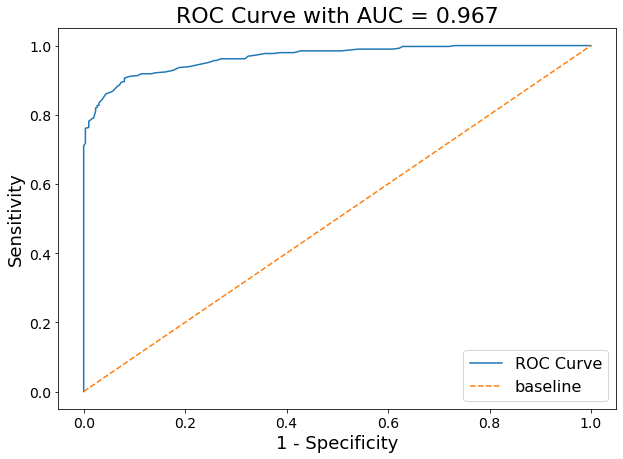

In [51]:
pred_proba = [i[1] for i in gs_tf.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])
# Create figure.
plt.figure(figsize = (10,7))

def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

# As all scores looks decent, I escaped the part for Lemmatizing & Stemming. If score is low, going back to stem the words is crucial

In [52]:
coefs =gs_tf.best_estimator_.named_steps['lr'].coef_[0]
features = gs_tf.best_estimator_.named_steps['tf'].get_feature_names()
expo = np.exp(coefs)
abs_coef = abs(coefs)

In [53]:
coef_df = pd.DataFrame({'features':features,'abs_coefs':abs_coef,'coef':coefs, 'expo':expo})

In [54]:
coef_df.sort_values(by='abs_coefs',ascending = False).head(20)

,features,abs_coefs,coef,expo
98,bran,3.673147,-3.673147,0.025396
734,sansa,3.672139,3.672139,39.335948
676,queen,2.446335,2.446335,11.545953
596,north,1.768270,1.768270,5.860704
469,king,1.389361,-1.389361,0.249234
536,love,1.286675,1.286675,3.620729
788,sophie,1.235601,1.235601,3.440445
192,dany,1.002453,1.002453,2.724957
499,lemon,0.830767,0.830767,2.295079
686,raven,0.780272,-0.780272,0.458281


<Figure size 1296x1080 with 0 Axes>

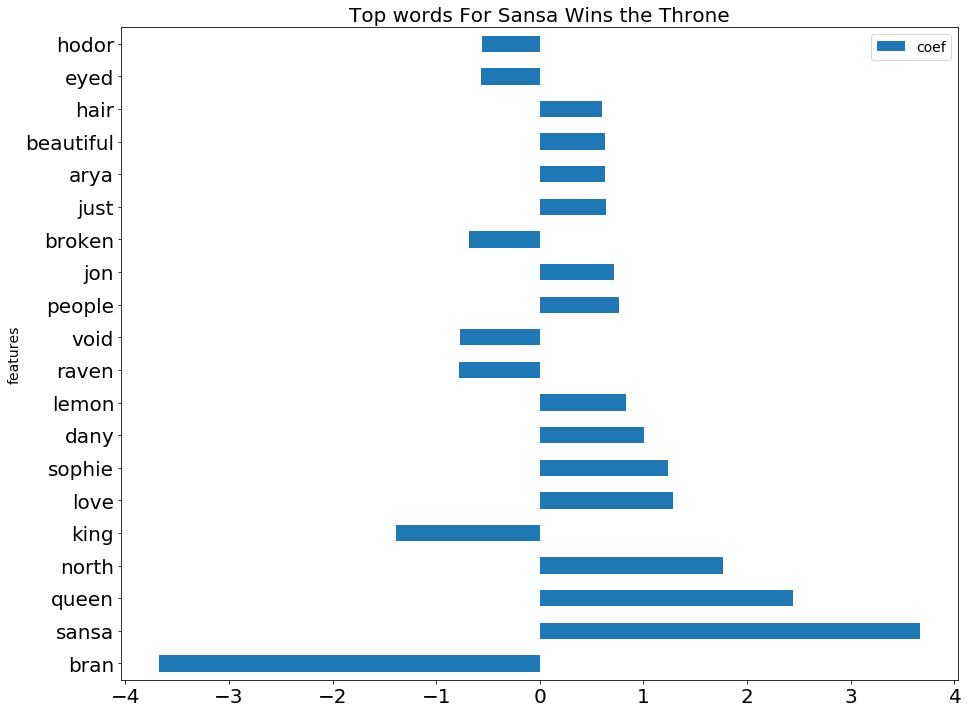

In [118]:
plt.figure(figsize=(18, 15))
bar_chart = coef_df.sort_values(by='abs_coefs',ascending = False).head(20)
bar_chart.plot.barh(x = 'features', y = 'coef',figsize = (15,12),fontsize = 20)
plt.title('Top words For Sansa Wins the Throne',fontsize = 20);

## Summary of all models' performance

| Score Result | y_train | y_test |  
| --- | --- | --- |
| CV+Logistic | 0.95 | 0.88 |
| CV+Multinomial | 0.94 | 0.843 |
| TIFDF+Logistic | 1.0 | 0.43 |
| Tifdf+Gaussian | 0.98 | 0.74 |
| CV+Logistic Pipeline | 0.97 | 0.90 |
| TIFDF+Logistic Pipeline | 0.94 | 0.91 |
| Random Forest pipeline | 0.996 | 0.89 |


## From The Table above we selected the best model for this data set:Tifdf with logistic pipeline gives the best result, we will continue to use this model to dive in more detail

## Cheatword: added to the list but take them out from the model--We want to see more. Cheatword removed: sansa, bran, queen, king, raven, eyed, holdor

In [56]:
stop_words_custom = text.ENGLISH_STOP_WORDS.union({'sansa','bran','queen','king','raven','eyed','hodor'})

In [57]:
pipe_tf_stop = Pipeline([
    ('tf', TfidfVectorizer(stop_words=stop_words_custom)),
    ('lr', LogisticRegressionCV())
])

params_grid_stop = {
    'tf__max_features': [2000,2500,3000],
    'tf__stop_words': [stop_words_custom],
    'tf__ngram_range': [(1,1), (1,2)],
    
}

gs_tf_stop = GridSearchCV(pipe_tf_stop, params_grid_stop)
gs_tf_stop.fit(X_train, y_train)


C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packa

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: Convergen

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [58]:
gs_tf_stop.score(X_train, y_train), gs_tf_stop.score(X_test, y_test)

(0.971042471042471, 0.8482658959537572)

In [59]:
gs_tf_stop.best_estimator_

Pipeline(memory=None,
         steps=[('tf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=3000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards',...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegressionCV(Cs=10, class

In [60]:
coefs_stop =gs_tf_stop.best_estimator_.named_steps['lr'].coef_[0]
features_stop = gs_tf_stop.best_estimator_.named_steps['tf'].get_feature_names()
expo_stop = np.exp(coefs_stop)
abs_coef_stop = abs(coefs_stop)

In [61]:
coef_df_stop = pd.DataFrame({'features_stop':features_stop,'abs_coefs_stop':abs_coef_stop,'coef_stop':coefs_stop, 'expo':expo_stop})

## Top 20 single words from our analysis without cheatwords

In [62]:
coef_df_stop.sort_values(by='abs_coefs_stop',ascending = False).head(20)

,features_stop,abs_coefs_stop,coef_stop,expo
1809,north,6.967083,6.967083,1061.122774
2417,sophie,3.439692,3.439692,31.177357
314,broken,3.115442,-3.115442,0.044359
1609,love,3.004936,3.004936,20.184932
569,dany,2.818679,2.818679,16.754698
1490,lemon,2.417920,2.417920,11.222488
150,arya,2.058955,2.058955,7.837773
218,beautiful,1.991670,1.991670,7.327763
1911,people,1.921487,1.921487,6.831107
1150,hair,1.893473,1.893473,6.642396


<Figure size 1440x1440 with 0 Axes>

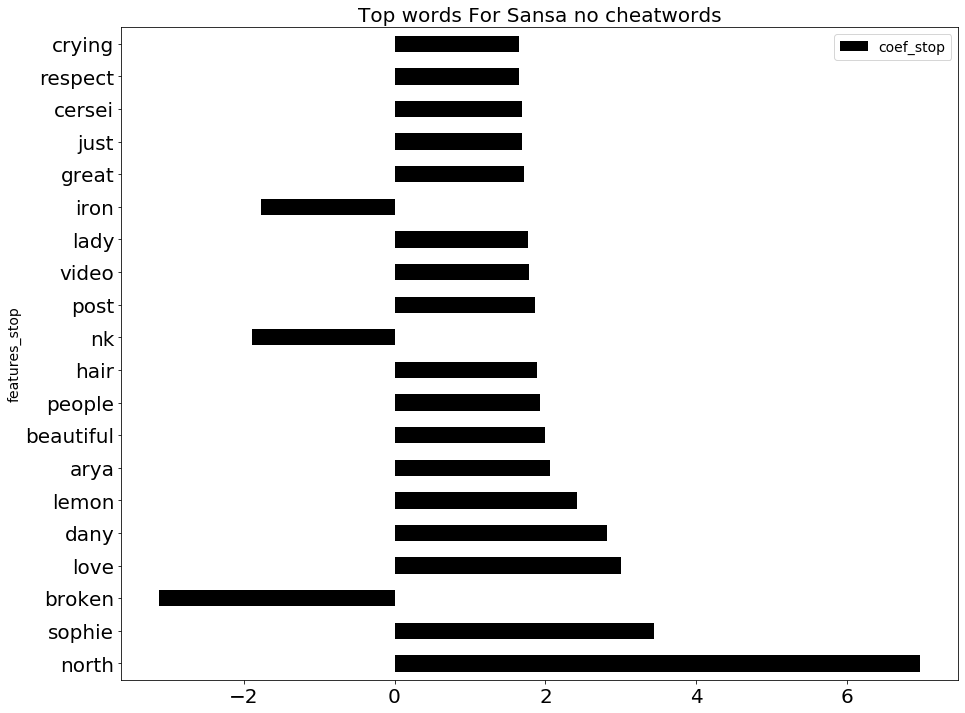

In [117]:
plt.figure(figsize=(20, 20))
bar_chart_stop = coef_df_stop.sort_values(by='abs_coefs_stop',ascending = False).head(20)
bar_chart_stop.plot.barh(x = 'features_stop', y = 'coef_stop',figsize = (15,12),fontsize = 20,color = 'black')
plt.title('Top words For Sansa no cheatwords',fontsize = 20);


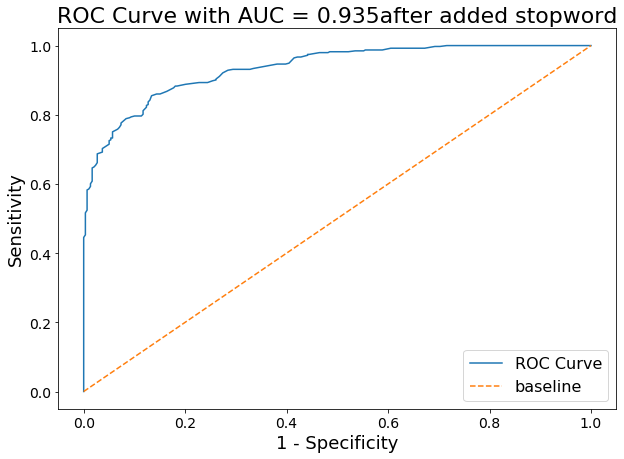

In [64]:
pred_proba = [i[1] for i in gs_tf_stop.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])
# Create figure.
plt.figure(figsize = (10,7))

def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}after added stopword', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## Is there any phrases with two words combination worth mentioning?

In [65]:
pipe_tf_2 = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegressionCV())
])

params_grid_2 = {
    'tf__max_features': [2000,2500,3000],
    'tf__stop_words': ['english', None],
    'tf__ngram_range': [(2,2)],
    
}

gs_tf_2 = GridSearchCV(pipe_tf_2, params_grid_2)
gs_tf_2.fit(X_train, y_train)

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packa

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [66]:
gs_tf_2.score(X_train, y_train), gs_tf_2.score(X_test, y_test)

(0.9700772200772201, 0.880057803468208)

In [67]:
coefs_2 =gs_tf_2.best_estimator_.named_steps['lr'].coef_[0]
features_2 = gs_tf_2.best_estimator_.named_steps['tf'].get_feature_names()
expo_2 = np.exp(coefs_2)
abs_coef_2 = abs(coefs_2)

In [68]:
coef_df_2 = pd.DataFrame({'features_2':features_2,'abs_coefs_2':abs_coef_2,'coef_2':coefs_2, 'expo_2':expo_2})

In [69]:
coef_df_2.sort_values(by='abs_coefs_2',ascending = False).head(20)

,features_2,abs_coefs_2,coef_2,expo_2
2267,the north,4.178051,4.178051,65.238547
1662,our queen,3.347912,3.347912,28.443283
1032,in the,3.144493,3.144493,23.207910
1733,queen in,2.921702,2.921702,18.572872
336,bran is,2.683002,-2.683002,0.068358
339,bran the,2.578062,-2.578062,0.075921
643,eyed raven,2.451174,-2.451174,0.086192
2180,the broken,2.224336,-2.224336,0.108139
1285,lemon cakes,2.189746,2.189746,8.932945
2288,the queen,2.182159,2.182159,8.865429


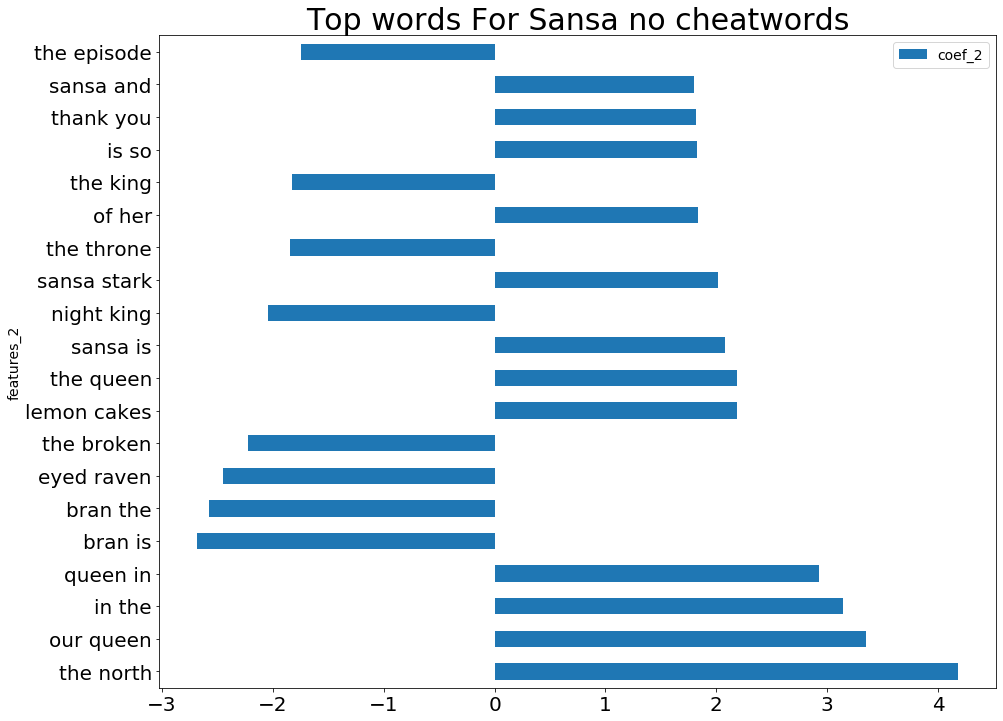

In [104]:
bar_chart_2 = coef_df_2.sort_values(by='abs_coefs_2',ascending = False).head(20)
bar_chart_2.plot.barh(x = 'features_2', y = 'coef_2',figsize = (15,12),fontsize = 20)
plt.title('Top words For Sansa no cheatwords',fontsize = 30);

## I know there are popular three words

In [71]:
pipe_tf_3 = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegressionCV())
])

params_grid_3 = {
    'tf__max_features': [2000,2500,3000],
    'tf__stop_words': ['english', None],
    'tf__ngram_range': [(3,3)],
    
}

gs_tf_3 = GridSearchCV(pipe_tf_3, params_grid_3)
gs_tf_3.fit(X_train, y_train)

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packa

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [72]:
gs_tf_3.score(X_train, y_train), gs_tf_3.score(X_test, y_test)

(0.9343629343629344, 0.8106936416184971)

In [73]:
coefs_3 =gs_tf_3.best_estimator_.named_steps['lr'].coef_[0]
features_3 = gs_tf_3.best_estimator_.named_steps['tf'].get_feature_names()
expo_3 = np.exp(coefs_3)
abs_coef_3 = abs(coefs_3)

In [74]:
coef_df_3 = pd.DataFrame({'features_3':features_3,'abs_coefs_3':abs_coef_3,'coef_3':coefs_3, 'expo_3':expo_3})

In [75]:
coef_df_3.sort_values(by='abs_coefs_3',ascending = False).head(20)

,features_3,abs_coefs_3,coef_3,expo_3
960,in the north,3.857307,3.857307,47.337718
1662,queen in the,3.696318,3.696318,40.298663
2500,three eyed raven,3.407876,-3.407876,0.033111
325,bran the broken,2.952783,-2.952783,0.052194
1496,of the north,2.642764,2.642764,14.051989
2172,the night king,2.055484,-2.055484,0.128031
2326,the three eyed,1.996098,-1.996098,0.135864
2261,the queen in,1.937388,1.937388,6.940599
2936,won the throne,1.934779,-1.934779,0.144456
967,in the show,1.931867,1.931867,6.902384


<Figure size 1440x1440 with 0 Axes>

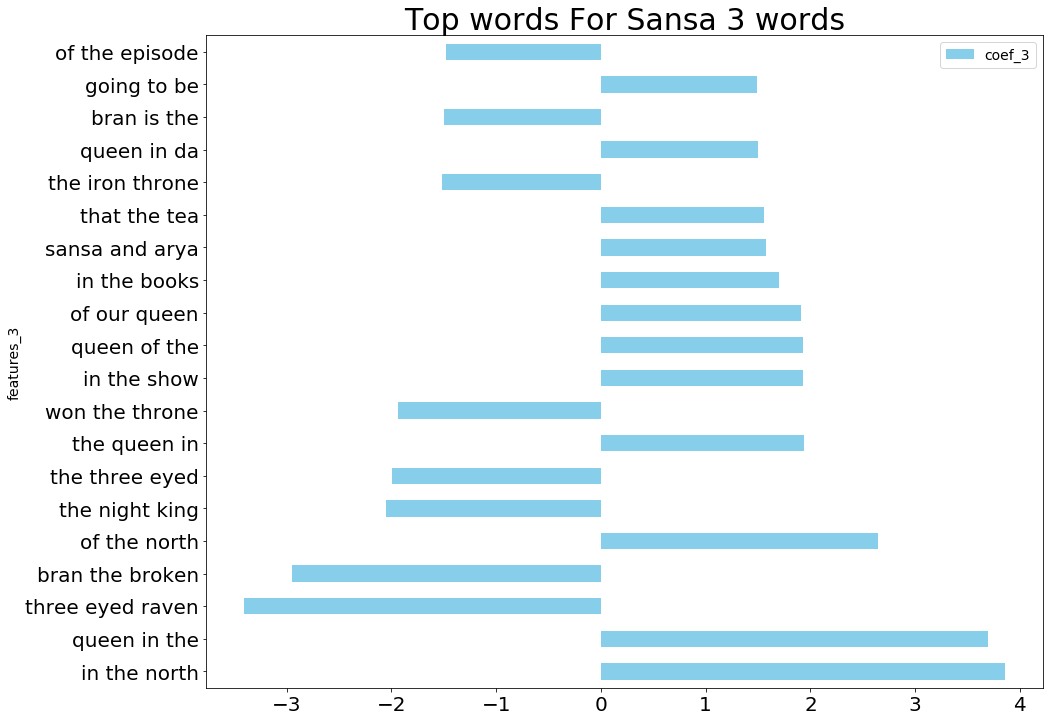

In [114]:
plt.figure(figsize=(20, 20))
bar_chart_3 = coef_df_3.sort_values(by='abs_coefs_3',ascending = False).head(20)
bar_chart_3.plot.barh(x = 'features_3', y = 'coef_3',figsize = (15,12), fontsize = 20, color = 'skyblue')
plt.title('Top words For Sansa 3 words',fontsize = 30);

## From the 3 words we can tell they belong to part of the 4th word. As 4-word phrases are the most common, This would be the last try.

In [77]:
pipe_tf_4 = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegressionCV())
])

params_grid_4 = {
    'tf__max_features': [2000,2500,3000],
    'tf__stop_words': ['english', None],
    'tf__ngram_range': [(4,4)],
    
}

gs_tf_4 = GridSearchCV(pipe_tf_4, params_grid_4)
gs_tf_4.fit(X_train, y_train)

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [78]:
gs_tf_4.score(X_train, y_train), gs_tf_4.score(X_test, y_test)

(0.8658301158301158, 0.7297687861271677)

In [79]:
coefs_4 =gs_tf_4.best_estimator_.named_steps['lr'].coef_[0]
features_4 = gs_tf_4.best_estimator_.named_steps['tf'].get_feature_names()
expo_4 = np.exp(coefs_4)
abs_coef_4 = abs(coefs_4)

In [80]:
coef_df_4 = pd.DataFrame({'features_4':features_4,'abs_coefs_4':abs_coef_4,'coef_4':coefs_4, 'expo_4':expo_4})

In [81]:
coef_df_4.sort_values(by='abs_coefs_4',ascending = False).head(20)

,features_4,abs_coefs_4,coef_4,expo_4
1460,not the iron throne,26.704657,-26.704657,2.525312e-12
2356,the three eyed raven,20.677935,-20.677935,1.046374e-09
717,going to have to,17.397001,-17.397001,2.783420e-08
2304,the queen in the,16.917681,16.917681,2.224618e+07
2462,thought the same thing,15.815043,-15.815043,1.353985e-07
1531,of the north also,15.465689,-15.465689,1.920156e-07
1958,since the end of,13.613810,-13.613810,1.223481e-06
2117,the bottom now we,11.999571,-11.999571,6.146852e-06
323,but in the end,11.845784,-11.845784,7.168716e-06
492,doesn want to rule,11.817487,-11.817487,7.374467e-06


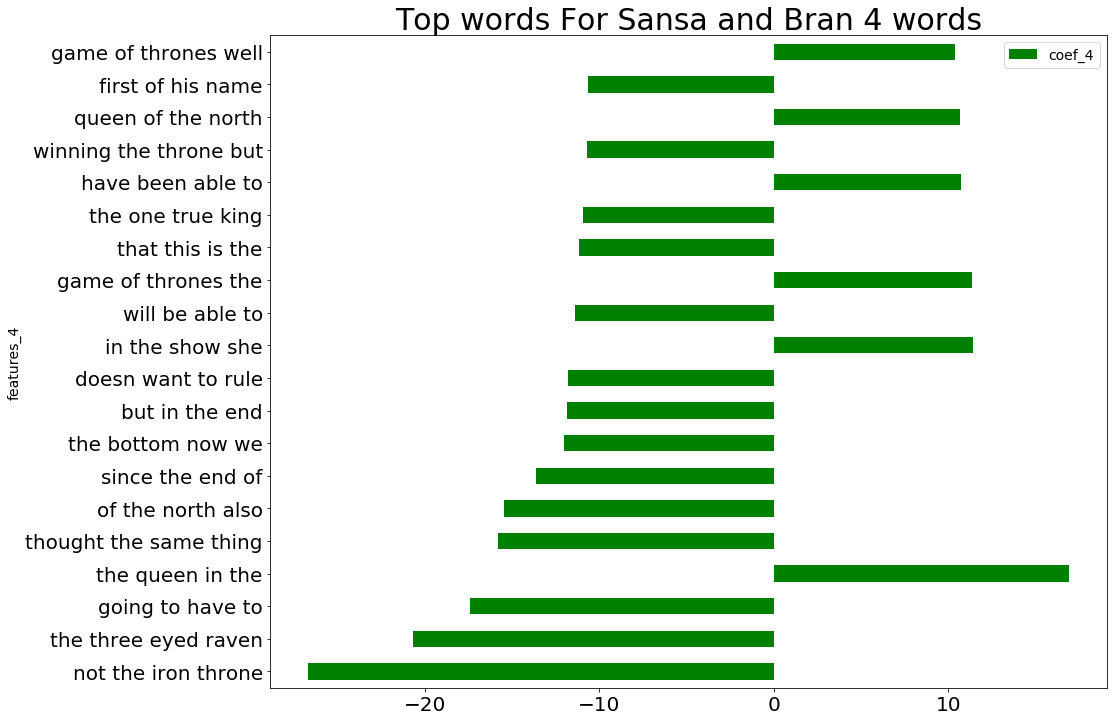

In [116]:
bar_chart_4 = coef_df_4.sort_values(by='abs_coefs_4',ascending = False).head(20)
bar_chart_4.plot.barh(x = 'features_4', y = 'coef_4',figsize = (15,12), fontsize = 20,color = 'green')
plt.title('Top words For Sansa and Bran 4 words',fontsize = 30);

# Summary: 
## By comparing SansaWInstheThrone and BranWinsThe Throne, we can clearly see people's emotion behind it and the words they use can tell if they are on one side or not. 

## Result of the word search: (I eliminate the ones are clearly part of the larger words)


| wordslist | Bran | Sansa |  
| --- | --- | --- |
| cheat word | bran,king,raven ,eyed,hodor| sansa,queen |
| one word | broken | north, sophie,love,dany |
| two word | the broken,night king | the north,our queen,lemon cakes |
| three word | three eyed raven,bran the broken,the night king,the three eyed,won the throne | of the north,sansa and arya |
| Four word | not the iron throne,the three eyed raven,going to have to,thought the same thing,since the end of,but in the end,doesn want to rule,winning the throne but | the queen in the,have been able to |


# Recommendation:
 - For one word and two words phrases, the clients can buy ad words that whenever a user typing them in this reddit, give them a pop up for client's website
 - Customer can bring small souvenirs such as pictures and items regarding lemmon cake, celabrities and ravens to their product collection
 - For 3 or 4 word phrases, can go with stickers and t-shirts

# If there are future step needed, we can compare more subreddit for all candidates to expand the collection 